Found local copy...
generating training, validation splits...
100%|██████████| 728/728 [00:00<00:00, 1378.45it/s]
Using backend: pytorch


Drug Property Prediction Mode...
in total: 637 drugs
encoding drug...
unique drugs: 634
do not do train/test split on the data for already splitted data
Drug Property Prediction Mode...
in total: 91 drugs
encoding drug...
unique drugs: 91
do not do train/test split on the data for already splitted data
Drug Property Prediction Mode...
in total: 182 drugs
encoding drug...
unique drugs: 181
do not do train/test split on the data for already splitted data
Let's use CPU/s!
--- Data Preparation ---
--- Go for Training ---
Training at Epoch 1 iteration 0 with loss 33.4654. Total time 0.0 hours
Validation at Epoch 1 , MSE: 1.84570 , Pearson Correlation: 0.28794 with p-value: 5.65E-03 , Concordance Index: 0.60782
Training at Epoch 2 iteration 0 with loss 4.77358. Total time 0.00055 hours
Validation at Epoch 2 , MSE: 3.82274 , Pearson Correlation: 0.47650 with p-value: 1.80E-06 , Concordance Index: 0.65207
Training at Epoch 3 iteration 0 with loss 2.30286. Total time 0.00138 hours
Validation at

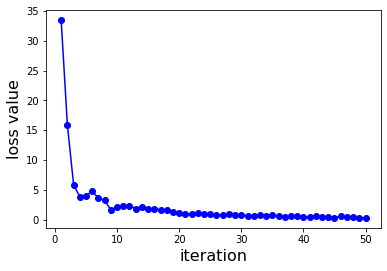

In [1]:
## if you are using the pip version, please comment out the below two lines
import os
os.chdir('../')

from DeepPurpose import CompoundPred as models
from DeepPurpose.utils import *
from tdc import BenchmarkGroup
group = BenchmarkGroup(name = 'ADMET_Group', path = 'data/')

import warnings
warnings.filterwarnings("ignore")

## 0.1.2 new supported models: 
## DGL_GCN, DGL_NeuralFP, DGL_GIN_AttrMasking, DGL_GIN_ContextPred, DGL_AttentiveFP  
drug_encoding = 'DGL_GCN'
    
benchmark = group.get('Caco2_Wang')

train, valid = group.get_train_valid_split(benchmark = benchmark['name'], split_type = 'default', seed = 1)

train = data_process(X_drug = train.Drug.values, y = train.Y.values, 
                drug_encoding = drug_encoding,
                split_method='no_split')

val = data_process(X_drug = valid.Drug.values, y = valid.Y.values, 
                drug_encoding = drug_encoding,
                split_method='no_split')

test = data_process(X_drug = benchmark['test'].Drug.values, y = benchmark['test'].Y.values, 
                drug_encoding = drug_encoding,
                split_method='no_split')

config = generate_config(drug_encoding = drug_encoding, 
                         cls_hidden_dims = [512], 
                         train_epoch = 10, 
                         LR = 0.001, 
                         batch_size = 128,
                        )

model = models.model_initialize(**config)
model.train(train, val, test, verbose = True)
y_pred = model.predict(test)